In [13]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='whitegrid')
import seaborn as sns

In [15]:
data = pd.read_csv('grocery.csv', parse_dates=['transaction_date'])

In [16]:
data.head()

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


In [17]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       1980 non-null   int64         
 1   store_name        1955 non-null   str           
 2   transaction_date  1980 non-null   datetime64[us]
 3   aisle             1980 non-null   str           
 4   product_name      1980 non-null   str           
 5   quantity          1980 non-null   float64       
 6   unit_price        1980 non-null   float64       
 7   total_amount      1980 non-null   float64       
 8   discount_amount   1980 non-null   float64       
 9   final_amount      1980 non-null   float64       
 10  loyalty_points    1980 non-null   int64         
dtypes: datetime64[us](1), float64(5), int64(2), str(3)
memory usage: 170.3 KB


In [18]:
try:
    data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')
    print('transaction_date column converted to datetime.\n')
except Exception as e:
    print(f'Error converting transaction_date: {e}')

missing_values = data.isnull().sum()
print('Missing values in each column:\n', missing_values)

data = data.dropna(subset=['transaction_date'])

numeric_cols = ['quantity', 'unit_price', 'total_amount', 'discount_amount', 'final_amount']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_cols)

data.shape

transaction_date column converted to datetime.

Missing values in each column:
 customer_id          0
store_name          25
transaction_date     0
aisle                0
product_name         0
quantity             0
unit_price           0
total_amount         0
discount_amount      0
final_amount         0
loyalty_points       0
dtype: int64


(1980, 11)

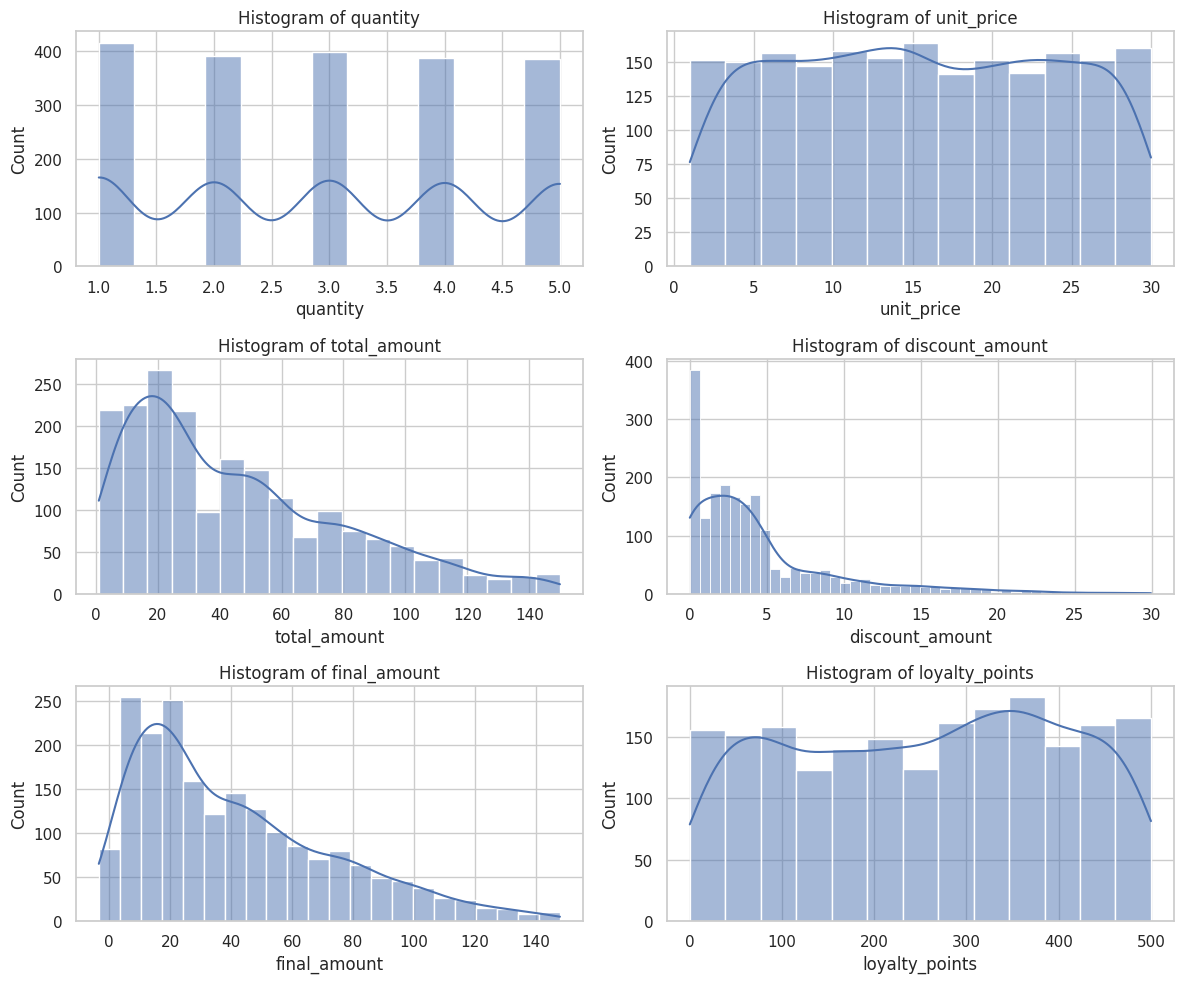

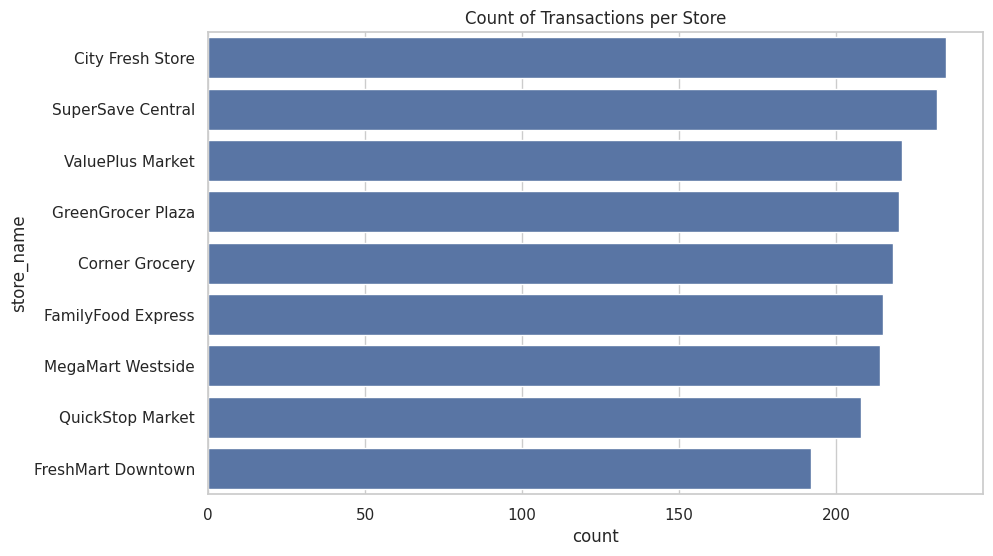

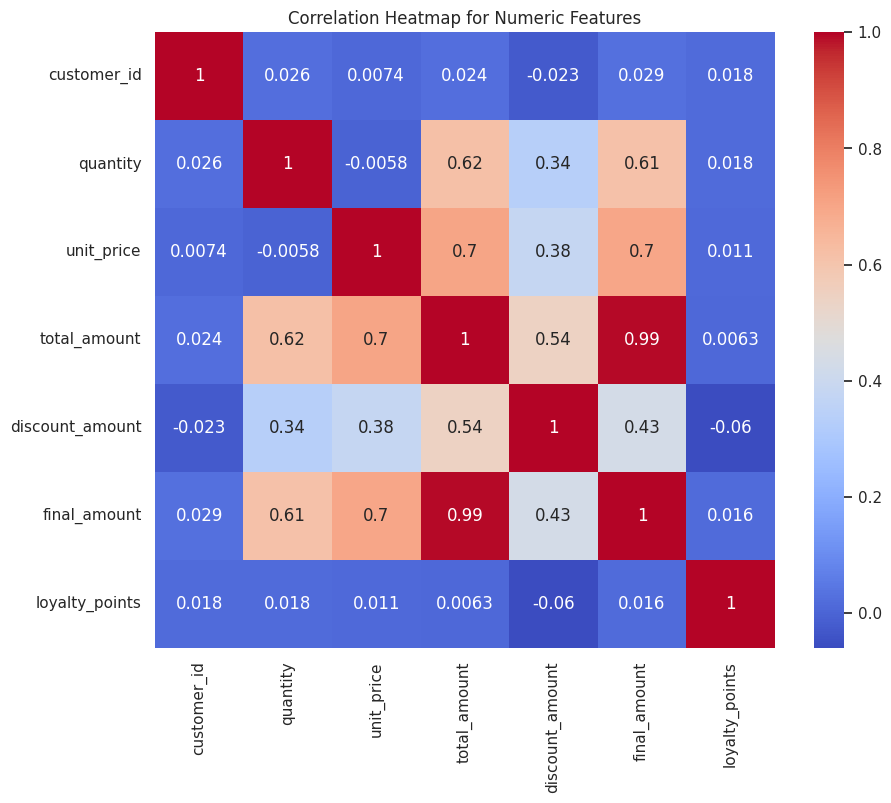

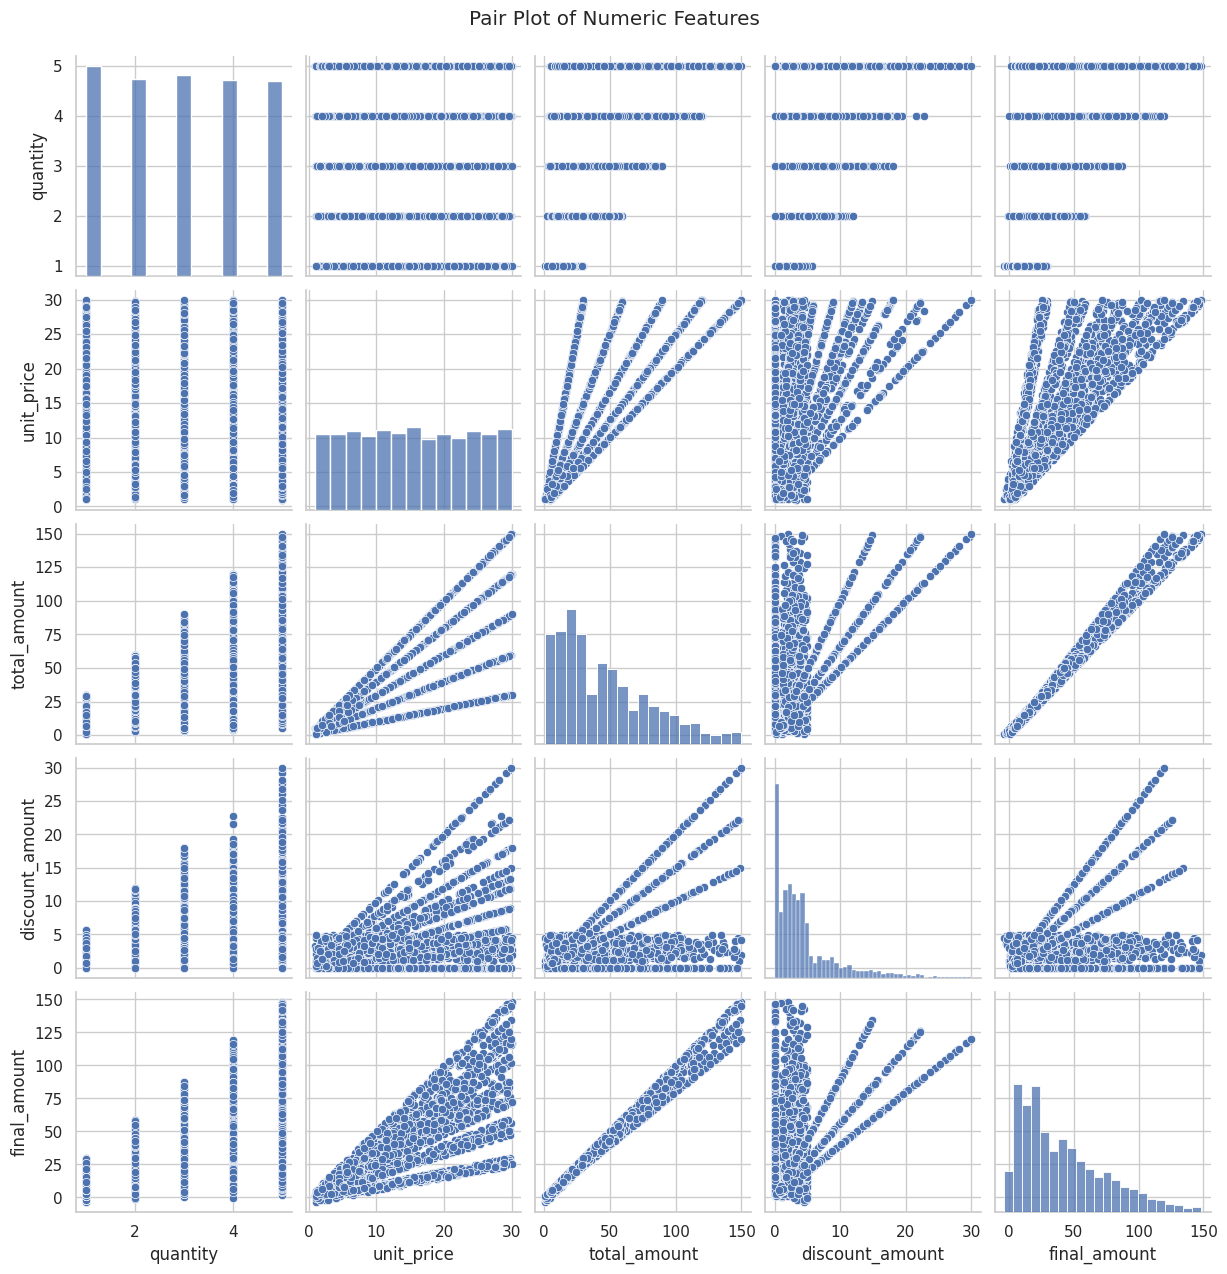

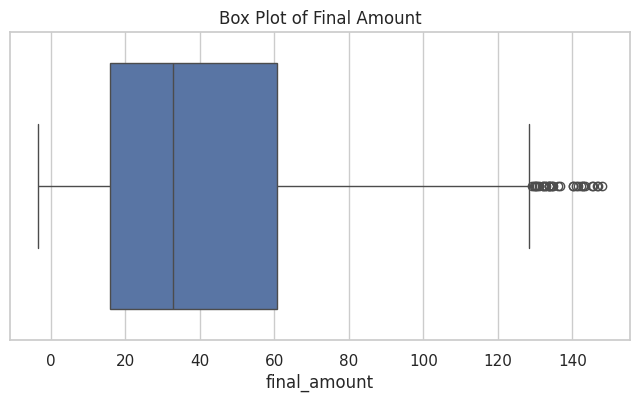

In [19]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(['quantity', 'unit_price', 'total_amount', 'discount_amount', 'final_amount', 'loyalty_points']):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='store_name', data=data, order=data['store_name'].value_counts().index)
plt.title('Count of Transactions per Store')
plt.show()

numeric_df = data.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns to generate a correlation heatmap.')

sns.pairplot(data[['quantity', 'unit_price', 'total_amount', 'discount_amount', 'final_amount']])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['final_amount'])
plt.title('Box Plot of Final Amount')
plt.show()

Feature engineering completed. Sample of new features:
  transaction_date  year  month  day  dayofweek  discount_ratio
0       2023-08-26  2023      8   26          5        0.000000
1       2024-02-13  2024      2   13          1        1.843243
2       2023-11-23  2023     11   23          3        0.136856
3       2025-01-13  2025      1   13          0        0.083030
4       2023-10-13  2023     10   13          4        0.034642


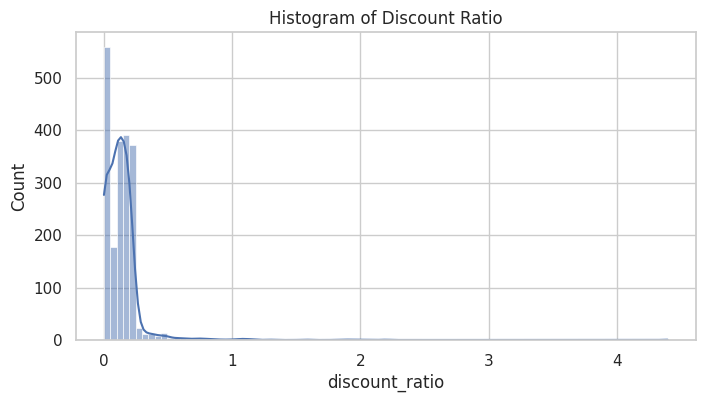

In [20]:
data['year'] = data['transaction_date'].dt.year
data['month'] = data['transaction_date'].dt.month
data['day'] = data['transaction_date'].dt.day
data['dayofweek'] = data['transaction_date'].dt.dayofweek

data['discount_ratio'] = data['discount_amount'] / data['total_amount']

print('Feature engineering completed. Sample of new features:')
print(data[['transaction_date', 'year', 'month', 'day', 'dayofweek', 'discount_ratio']].head())

plt.figure(figsize=(8, 4))
sns.histplot(data['discount_ratio'], kde=True)
plt.title('Histogram of Discount Ratio')
plt.show()

Linear Regression model R^2 score: 0.8712


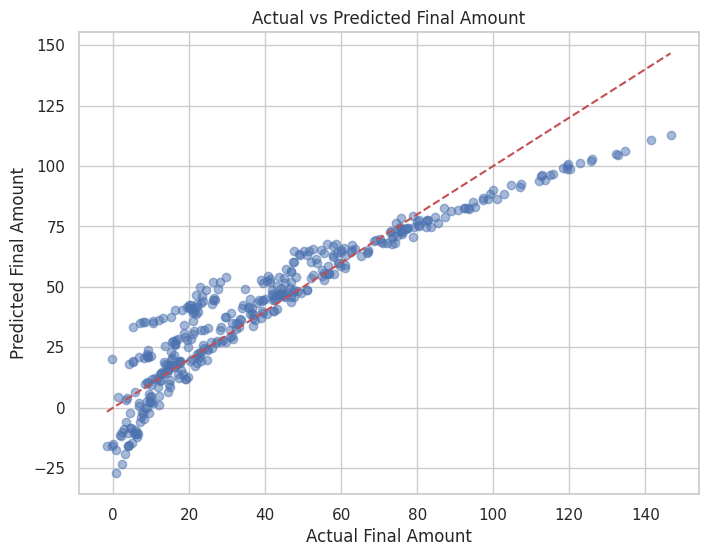

In [21]:
features = ['quantity', 'unit_price', 'discount_amount', 'loyalty_points', 'discount_ratio', 'dayofweek']
target = 'final_amount'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Linear Regression model R^2 score: {score:.4f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Final Amount')
plt.ylabel('Predicted Final Amount')
plt.title('Actual vs Predicted Final Amount')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()